----------------------------------------------------
Input Data          
----------------------------------------------------

    age         workclass  fnlwgt     education  education.num marital.status  \
0    90                 ?   77053       HS-grad              9        Widowed   
1    82           Private  132870       HS-grad              9        Widowed   
2    66                 ?  186061  Some-college             10        Widowed   
3    54           Private  140359       7th-8th              4       Divorced   
4    41           Private  264663  Some-college             10      Separated   
5    34           Private  216864       HS-grad              9       Divorced   
6    38           Private  150601          10th              6      Separated   
7    74         State-gov   88638     Doctorate             16  Never-married   
8    68       Federal-gov  422013       HS-grad              9       Divorced   
9    41           Private   70037  Some-college             10

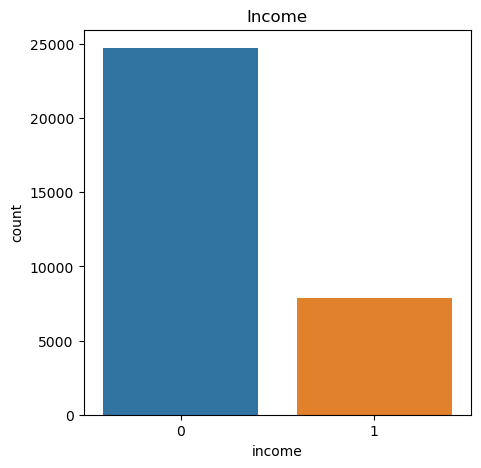

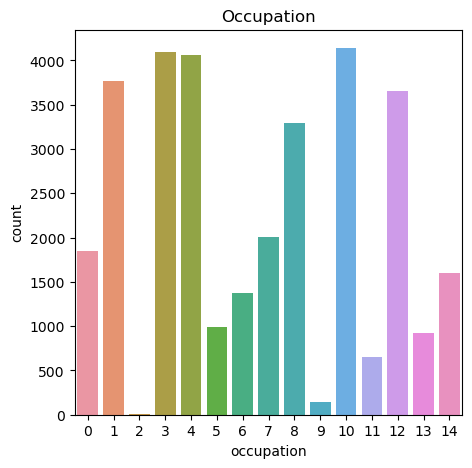

In [1]:
#============================= IMPORT LIBRARIES =============================

import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

#============================= DATA SELECTION ==============================
dataframe=pd.read_csv("adult.csv")

print("----------------------------------------------------")
print("Input Data          ")
print("----------------------------------------------------")
print()
print(dataframe.head(20))


#============================= PREPROCESSING ==============================

#==== checking missing values ====

print("----------------------------------------------------")
print(" Checking Missing Values          ")
print("----------------------------------------------------")
print()
print(dataframe.isnull().sum())

#==== LABEL ENCODING ====

label_encoder = preprocessing.LabelEncoder() 
print("------------------------------------------------------")
print(" Before label encoding")
print("------------------------------------------------------")
print()
print(dataframe['income'].head(10))

print("------------------------------------------------------")
print(" After label encoding")
print("------------------------------------------------------")
print()

dataframe['workclass']=label_encoder.fit_transform(dataframe['workclass'])
dataframe['education']=label_encoder.fit_transform(dataframe['education'])
dataframe['marital.status']=label_encoder.fit_transform(dataframe['marital.status'])

dataframe['occupation']=label_encoder.fit_transform(dataframe['occupation'])
dataframe['relationship']=label_encoder.fit_transform(dataframe['relationship'])
dataframe['race']=label_encoder.fit_transform(dataframe['race'])

dataframe['sex']=label_encoder.fit_transform(dataframe['sex'])
dataframe['native.country']=label_encoder.fit_transform(dataframe['native.country'])
dataframe['income']=label_encoder.fit_transform(dataframe['income'])

print(dataframe['income'].head(10))

#========================= DATA SPLITTING ==============================

print("----------------------------------------------------")
print("Data Splitting          ")
print("----------------------------------------------------")
print()

from sklearn.model_selection import train_test_split

X = dataframe.drop('income', axis=1)
y = dataframe['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("Total no of data's       :",dataframe.shape[0])
print()
print("Total no of Train data's :",X_train.shape[0])
print()
print("Total no of Test data's  :",X_test.shape[0])

# === K NEAREST NEIGHBOUR =====


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
 
# fit the regressor with x and y data
knn.fit(X_train, y_train) 

Y_pred_knn = knn.predict(X_test)

from sklearn import metrics

Accuracy_knn=metrics.accuracy_score(y_test,Y_pred_knn)*100
 
 
print("----------------------------------------")
print("K NEAREST NEIGHBOUR --> KNN")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_knn,'%' )
print()
print(metrics.classification_report(y_test,Y_pred_knn))


#========================= CLASSIFICATION ==============================



from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()

gbt.fit(X_train, y_train)

y_pred_gbt = gbt.predict(X_test)

from sklearn import metrics

acc_gbt=metrics.accuracy_score(y_pred_gbt,y_test)*100

print("----------------------------------------")
print(" Gradient Boosting Algorithm ")
print("----------------------------------------")
print()
print("1. Accuracy = ", acc_gbt,'%')
print()
print(metrics.classification_report(y_pred_gbt,y_test))
print()


#========================= PREDICTION ==============================

print("----------------------------------------------------")
print("Prediction ---> Census Income ")
print("----------------------------------------------------")
print()
print()


for i in range(0,10):
    if y_pred_gbt[i]==1:
        print("-----------------------------")
        print()
        print([i],"The Census Income = '50K'")
    else:
        print("------------------------------")
        print()
        print([i],"The Census Income = '<=50K'")      


# === VISUALIZATION ===

import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Income")
sns.countplot(x='income',data=dataframe)
plt.show()



import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Occupation")
sns.countplot(x='occupation',data=dataframe)
plt.show()
